# 2019 Winter STAT 231B Homework 2 --- Kernel SVM

Write Gaussian kernal SVM.

1. Finish my_SVM function. Notice that the input include "kernel method". If kernel=None, run simple SVM without kernel. If kernel="Gaussian", run SVM with gaussian kernal. You are welcome to implement other kernal and try it below. Notice the input Y_test should only be used for accuracy calculation, not predicting and training. When grading, real Y_test will not be provided (by provide all zero vector).

2. Run this jupyterbook. See the accuracy for both training and testing. To get full score, reach at least 85% accuracy on both training and testing. >92% is preferred. 

3. Print this jupyterbook to pdf (ctrl + P).  If you face problem printing it, copy paste all things (include code and graph) into word and save as pdf.

4. Fill my_SVM function and its dependency function in HW2_SVM.py files. (Just copy from jupyter book) Make sure there is nothing outside function definition. (That is, only import line and code inside def function is allowed). 

5. In CCLE, upload both pdf files and the py files. DO NOT UPLOAD other files include ipynb. 

In [30]:
import numpy as np
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def prepare_data(num=[1,3,5,7,9]):
    ## valid_digits is a vector containing the digits
    ## we wish to classify.
    ## Do not change anything inside of this function
    data = ds.load_digits()
    labels = data['target']
    features = data['data']
    X = features
    Y = labels
    X = X / np.repeat(np.max(X, axis=1), 64).reshape(X.shape[0], -1)
    for i in range(len(Y)):
      Y[i] = 1 if Y[i] in num else 0

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.25, random_state=10)
    Y_train = Y_train.reshape((len(Y_train), 1))
    Y_test = Y_test.reshape((len(Y_test), 1))
    
    return X_train, Y_train, X_test, Y_test

def gau_kernel(x, y, gamma):
    return np.exp(-gamma * (x-y) ** 2)

In [86]:
def predict(X_train, Y_train, X_test, alpha, kernel=None, gamma=0.1):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    Y_pre = np.zeros(n_test)
    if kernel == 'Gaussian':
        for i in range(n_test):
            Y_pre[i] = (Y_train*alpha[:,np.newaxis]).T.dot(np.prod(gau_kernel(X_train,X_test[i,:],gamma),axis=1)[:,np.newaxis])
    elif kernel == None:
        for i in range(n_test):
            Y_pre[i] = (Y_train*alpha[:,np.newaxis]).T.dot(X_train.dot(X_test[i,:][:,np.newaxis]))   
    Y_pre = np.sign(Y_pre).reshape((n_test,1))
    return Y_pre

def my_SVM(X_train, Y_train, X_test, Y_test, kernel=None, lamb=0.01, num_iterations=200, learning_rate=0.1):
    ## X_train: Training set of features
    ## Y_train: Training set of labels corresponding to X_train
    ## X_test: Testing set of features
    ## Y_test: Testing set of labels correspdonding to X_test
    ## lamb: Regularization parameter
    ## num_iterations: Number of iterations.
    ## learning_rate: Learning rate.

    ## Function should learn the parameters of an SVM.
    ## Intercept term is needed.
    Y_train[Y_train == 0] = -1
    Y_test[Y_test == 0] = -1
    C = 1/lamb
    gamma = 0.1
    n, d = X_train.shape
    alpha = np.random.uniform(0,C,n)
    Q = np.zeros((n,n))
    acc_train = np.zeros(num_iterations)
    acc_test = np.zeros(num_iterations)
    
    if kernel == 'Gaussian':
        for i in range(n):
            for j in range(n):
                Q[i,j] = Y_train[i]*Y_train[j]*np.prod(gau_kernel(X_train[i,:],X_train[j,:],gamma))
    elif kernel == None:
        for i in range(n):
            for j in range(n):
                Q[i,j] = Y_train[i]*Y_train[j]*(X_train[i,:].dot(X_train[j,:]))       
                
    for it in range(num_iterations):
        for i in range(n):
            dalpha = (1-Q[i,:].dot(alpha))
            dalpha /= Q[i,i]
            alpha[i] += learning_rate*dalpha           
            if alpha[i] < 0:
                alpha[i] = 0
            elif alpha[i] > C:
                alpha[i] = C        
                
        Y_train_pre = predict(X_train,Y_train,X_train, alpha, kernel = kernel)
        Y_test_pre = predict(X_train,Y_train,X_test, alpha, kernel = kernel)            
        acc_train[it] = np.sum(Y_train == Y_train_pre)/len(Y_train)
        acc_test[it] = np.sum(Y_test == Y_test_pre)/len(Y_test)               
        if it % 100 == 0:
            print("Training Accuracy: ", acc_train[it])
            print("Testing Accuracy: ", acc_test[it])
    return acc_train, acc_test, Y_train_pre, Y_test_pre

Linear SVM

Training Accuracy:  0.8901262063845583
Testing Accuracy:  0.8711111111111111
Training Accuracy:  0.8626577579806979
Testing Accuracy:  0.8577777777777778
Training Accuracy:  0.8663697104677061
Testing Accuracy:  0.8555555555555555
Training Accuracy:  0.8700816629547142
Testing Accuracy:  0.8533333333333334
Training Accuracy:  0.8849294729027468
Testing Accuracy:  0.8666666666666667
Training Accuracy:  0.8938381588715665
Testing Accuracy:  0.8711111111111111
Training Accuracy:  0.8953229398663697
Testing Accuracy:  0.8733333333333333
Training Accuracy:  0.8982925018559762
Testing Accuracy:  0.8777777777777778
Training Accuracy:  0.8982925018559762
Testing Accuracy:  0.8777777777777778
Training Accuracy:  0.9020044543429844
Testing Accuracy:  0.8866666666666667


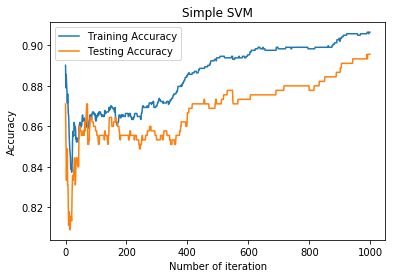

In [71]:
X_train, Y_train, X_test, Y_test = prepare_data()

acc_train, acc_test, Y_trainp, Y_testp = my_SVM(X_train, Y_train, X_test, Y_test, num_iterations=1000)

ax = plt.plot(range(len(acc_test)), acc_train, range(len(acc_test)), acc_test)
plt.title("Simple SVM")
plt.xlabel('Number of iteration')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy', 'Testing Accuracy'))
plt.show()

Kernel SVM

Training Accuracy:  0.9213066072754269
Testing Accuracy:  0.92
Training Accuracy:  0.9903489235337788
Testing Accuracy:  0.9755555555555555
Training Accuracy:  1.0
Testing Accuracy:  0.9866666666666667
Training Accuracy:  1.0
Testing Accuracy:  0.9911111111111112
Training Accuracy:  1.0
Testing Accuracy:  0.9911111111111112
Training Accuracy:  1.0
Testing Accuracy:  0.9911111111111112
Training Accuracy:  1.0
Testing Accuracy:  0.9911111111111112
Training Accuracy:  1.0
Testing Accuracy:  0.9911111111111112
Training Accuracy:  1.0
Testing Accuracy:  0.9911111111111112
Training Accuracy:  1.0
Testing Accuracy:  0.9911111111111112


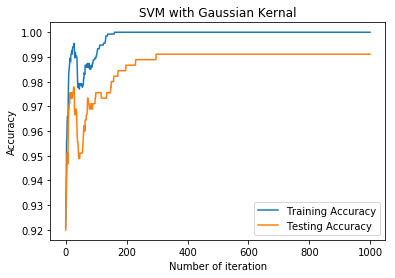

In [87]:
X_train, Y_train, X_test, Y_test = prepare_data()

acc_train, acc_test, Y_trainp, Y_testp = my_SVM(X_train, Y_train, X_test, Y_test, kernel='Gaussian', num_iterations=1000)

ax = plt.plot(range(len(acc_test)), acc_train, range(len(acc_test)), acc_test)
plt.title("SVM with Gaussian Kernal")
plt.xlabel('Number of iteration')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy', 'Testing Accuracy'))
plt.show()